Você acaba de ser contratado como cientista de dados e está encubido de auxiliar a equipe atuarial a determinar melhorias na tabela atualmente praticada nos seguros de automóveis nos Estados Unidos. Diversos estudos relativos a demografia foram feitos e incorporados na tabela atual, restando apenas analisar região a região quais as possíveis economias.

Para isso, você deve utilizar os dados de acidentes rodoviários dos Estados Unidos do período de fevereiro de 2016 a dezembro de 2019 para dar insumos proveitosos para a equipe atuarial. Além disso, também é esperado que você apresente suas descobertas para a diretoria de vendas, pois as alterações na tabela resultarão em uma mudança no plano de negócios atual. Portanto, determine a melhor forma de apresentar graficamente o que realmente irá convencer a diretoria de que as mudanças na tabela atuarial irão resultar em ganhos financeiros para a empresa como um todo.

In [1]:
import os, sys
from joblib import load, dump
from google.colab import drive

drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
sys.path.insert(0,nb_path)
%cd /content/gdrive

Mounted at /content/gdrive
/content/gdrive


base de referencia https://www.kaggle.com/sobhanmoosavi/us-accidents/notebooks

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Exercicio/US_Accidents_Dec20_updated.csv',parse_dates=['Start_Time','End_Time'],sep=',',encoding='utf-8 ')
#data = pd.read_csv('/content/gdrive/MyDrive/Exercicio/US_Accidents_Dec20_updated.csv',sep=',',encoding='utf-8 ')

# Sequencia de passos do exercicio

## Tratativa da base

importando todas as bibliotecas importantes para cálculo e criação de visualização gráfica

importando o arquivo em si, usando encoding utf-8 (como é um arquivo americano cobre todos os caracteres)

Como o arquivo e muito grande, podemos utilizar apenas as primeiras ou ultimas 100000 linhas

Garanta que não existam linhas duplicadas no seu dataset, isso pode enviesar sua análise no final.

Vamos trocar a nomenclatura das colunas para deixar a interpretação mais fácil tanto para a equipe atuarial quanto para a equipe de vendas. Escolha de nomes é livre

Tratar as células que contém data, para garantir que estão no formato de data legível pelo Python



Vamos verificar em quais colunas há valores nulos e se há a necessidade de preenchê-los

Podemos ver que temos muitas variáveis que possuem valor nulo. Abaixo seguem listadas quais são elas e como elas devem ser tratadas quando nulas.

End Lat - preencher com "N/A"

End Lng - preencher com "N/A"

Street_Number - preencher com "N/A"

City - preencher com "N/A"

Sunrise_Sunset - preencher com "N/A"

Civil_Twilight - preencher com "N/A"

Nautical_Twilight - preencher com "N/A"

Astronomical_Twilight - preencher com "N/A"

Timezone - preencher com "N/A"

Airport Code - preencher com "N/A"

Weather Timestamp - preencher com "N/A"

Wind_Direction - preencher com "N/A"

Weather_Condition - preencher com "N/A"

Traffic_Message_Channel - preencher com o valor 999 ou com o valor 0

Zipcode - preencher com 99999

Temperature (F) - preencher com a media da temperatura para cada periodo em cada cidade (Manha,Tarde,Noite,Madrugada:6a12h,12a18h,18a24h,24a6h)

Wind_Chill(F) - preencher com 999

Humidity(%) - preencher com 0

Pressure(in) - preencher com 0

Visibility(mi) - preencher com 0

Wind_Speed(mph) - preencher com 0

Precipitation(in) - preencher com 0

Vamos converter mph para Kmph, in para cm, mi para km e F para C

### formulas

F para C : (X − 32) × 5/9

in para cm : x * 2.54

mph para kmph e mi para km : x * 1.6

Agora que toda a base está tratada, vamos observar alguns dados gerais antes de começar nossas análises de fato? Vamos começar olhando dados estatísticos gerais da base.

## Análises auxiliares para equipe atuarial

Aqui voce pode seguir sua criatividade e brincar com a informacao.

Algumas sugestões de relações que podem impactar no estudo atuarial por região:

Severidade do acidente versus região

Severidade do acidente versus região versus horário do dia

Severidade do acidente versus temperatura versus precipitação

Quantidade de acidentes por severidade por região

Encontrar quais regioes possuem o maior numero de acidentes

Encontrar o periodo do dia com maior numero de acidentes

Verificar correlacoes entre as variaveis e o numero de acidentes

# Teste SQL

## Tabelas de referencia

#### monte as querys com base nos esquemas abaixa

create table books(id int, title varchar(250), year int, author varchar(250));

create table reviewers(id int, name varchar(250));

create table ratings(reviewer_id int, book_id int, rating int, rating_date date);

#### Selecione os livros que tem rating maior que 4, livros devem ser ordenados alfabeticamente

#### Mostre a quantidade de reviews para cada titulo, assim como sua nota media, minima e maxima

#### Mostre a quantidade de reviews por reviewer e ordene pela media da notas do reviewer

In [4]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
# Importamos a biblioteca re "expressão regular" 
# elininamos caracteres por espaços vacios e padronizamos pra letras nimusculas com lower()
import re
def corrige_colunas(col_name):
    return re.sub(r"[_| ]", "", col_name).lower()

In [6]:
# Vamos corrigir todas as columnas do data
data.columns = [corrige_colunas(col) for col in data.columns]

In [7]:
data.head()

,id,severity,starttime,endtime,startlat,startlng,endlat,endlng,distance(mi),description,...,roundabout,station,stop,trafficcalming,trafficsignal,turningloop,sunrisesunset,civiltwilight,nauticaltwilight,astronomicaltwilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [ ]:
list(data)

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
# verificamos tipos de valores
data.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


In [ ]:
# Ora meneira de transformando coluna de data em data é :
# data['Start_Time'] = pd.to_datetime(data['Start_Time'])
# data['End_Time'] = pd.to_datetime(data['End_Time'])

In [ ]:
# eliminanado linhas duplicadas
data.drop_duplicates(ignore_index=True)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# Vamos verificar em quais colunas há valores nulos e se há a necessidade de preenchê-los
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

Podemos ver que temos muitas variáveis que possuem valor nulo. Abaixo seguem listadas quais são elas e como elas devem ser tratadas quando nulas.

End Lat - preencher com "N/A"

End Lng - preencher com "N/A"

Street_Number - preencher com "N/A"

City - preencher com "N/A"

Sunrise_Sunset - preencher com "N/A"

Civil_Twilight - preencher com "N/A"

Nautical_Twilight - preencher com "N/A"

Astronomical_Twilight - preencher com "N/A"

Timezone - preencher com "N/A"

Airport Code - preencher com "N/A"

Weather Timestamp - preencher com "N/A"

Wind_Direction - preencher com "N/A"

Weather_Condition - preencher com "N/A"

Traffic_Message_Channel - preencher com o valor 999 ou com o valor 0

Zipcode - preencher com 99999

Temperature (F) - preencher com a media da temperatura para cada periodo em cada cidade (Manha,Tarde,Noite,Madrugada:6a12h,12a18h,18a24h,24a6h)

Wind_Chill(F) - preencher com 999

Humidity(%) - preencher com 0

Pressure(in) - preencher com 0

Visibility(mi) - preencher com 0

Wind_Speed(mph) - preencher com 0

Precipitation(in) - preencher com 0

In [ ]:
data['End_Lat'].fillna(value='N/A', inplace=True)

In [ ]:
data['End_Lng'].fillna(value='N/A', inplace=True)

In [ ]:
data['City'].fillna(value='N/A', inplace=True)

In [ ]:
data['Sunrise_Sunset'].fillna(value='N/A', inplace=True)

In [ ]:
data['Civil_Twilight'].fillna(value='N/A', inplace=True)

In [ ]:
data['Civil_Twilight'].fillna(value='N/A', inplace=True)

In [ ]:
data['Nautical_Twilight'].fillna(value='N/A', inplace=True)

In [ ]:
data['Astronomical_Twilight'].fillna(value='N/A', inplace=True)

In [ ]:
data['Timezone'].fillna(value='N/A', inplace=True)

In [ ]:
data['Airport_Code'].fillna(value='N/A', inplace=True)

In [ ]:
data['Weather_Timestamp'].fillna(value='N/A', inplace=True)

In [ ]:
data['Wind_Direction'].fillna(value='N/A', inplace=True)

In [ ]:
data['Weather_Condition'].fillna(value='N/A', inplace=True)

In [ ]:
data['Zipcode'].fillna(value=99999, inplace=True)

In [ ]:
data['Wind_Chill(F)'].fillna(value=999, inplace=True)

In [ ]:
data['Humidity(%)'].fillna(value=0, inplace=True)

In [ ]:
data['Pressure(in)'].fillna(value=0, inplace=True)

In [ ]:
data['Visibility(mi)'].fillna(value=0, inplace=True)

In [ ]:
data['Wind_Speed(mph)'].fillna(value=0, inplace=True)

In [ ]:
data['Precipitation(in)'].fillna(value=0, inplace=True)

In [ ]:
# mudamos de nome ao cabeçalho Temperature(F) por Temperature
# por que o python não esta reconhecendo a variável com argumento
data.rename(columns={'Temperature(F)':'Temperature'}, inplace=True)

In [ ]:
data["Temperature"].fillna(data["Temperature"].mean(), inplace=True)
# Preenchendo os valores não informados da variável Temperature com a média
#df2 = data.copy()
#df2.Temperature = data.Temperature.fillna(data.Temperature.mean())

In [ ]:
# se queremos sustituir por CERO e não por a media 
# df["Vendas"].fillna(0, inplace=True)

In [ ]:
# podemos ver que não temos valores não informados porque foram substituidos pela média
data.Temperature.isna().sum()

0

In [ ]:
#df2['Temperature'].tail(20)

In [ ]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature                    0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity   

In [ ]:
data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
# Para cada variável no Data, iremos pegar a quantidade de dados nulos
# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)
#nulos = pd.DataFrame()
#nulos['Variável'] = data.columns

In [ ]:
#nulos

In [ ]:
# criamos uma nova coluna de converção de temperatura
data['convTempCent'] = (data['Temperature']-32)*(5/9)

In [ ]:
data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,convTempCent
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,5.611111
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2.722222


In [ ]:
list(data)

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'convTempCent']

In [ ]:
data['Severity']

0          3
1          2
2          2
3          2
4          2
          ..
1516059    2
1516060    2
1516061    2
1516062    2
1516063    2
Name: Severity, Length: 1516064, dtype: int64

Aqui voce pode seguir sua criatividade e brincar com a informacao.

Algumas sugestões de relações que podem impactar no estudo atuarial por região:

Severidade do acidente versus região

Severidade do acidente versus região versus horário do dia

Severidade do acidente versus temperatura versus precipitação

Quantidade de acidentes por severidade por região

Encontrar quais regioes possuem o maior numero de acidentes

Encontrar o periodo do dia com maior numero de acidentes

Verificar correlacoes entre as variaveis e o numero de acidentes

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data['Severity'].value_counts(ascending=False)

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

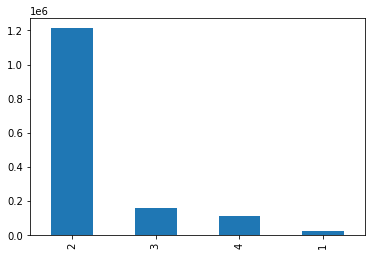

In [ ]:
#Graficos de barras
data['Severity'].value_counts(ascending=False).plot.bar();

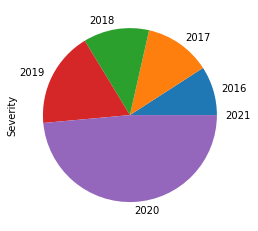

In [ ]:
#GARAFICO DE PIZA
data.groupby(data['End_Time'].dt.year)['Severity'].sum().plot.pie();

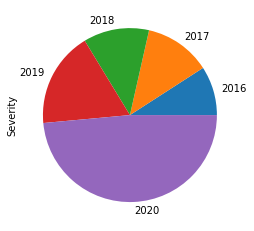

In [ ]:
data.groupby(data['Start_Time'].dt.year)['Severity'].sum().plot.pie();

In [ ]:
# total por cidade
data['City'].value_counts()

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10658, dtype: int64

In [ ]:
plt.style.use('ggplot')

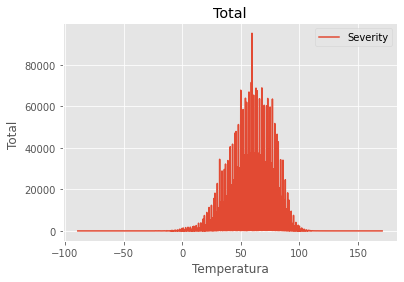

In [ ]:
data.groupby(data['Temperature'])['Severity'].sum().plot(title = 'Total')
plt.xlabel('Temperatura')
plt.ylabel('Total ');
plt.legend();

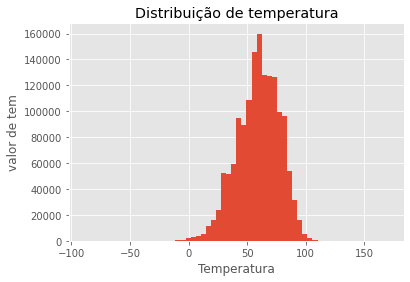

In [ ]:
data.Temperature.hist(bins = 60)
plt.xlabel("Temperatura")
plt.ylabel("valor de tem")
plt.title("Distribuição de temperatura")
plt.show()

## Teste SQL
create table books(id int, title varchar(250), year int, author varchar(250));

create table reviewers(id int, name varchar(250));

create table ratings(reviewer_id int, book_id int, rating int, rating_date date);

In [ ]:
CREATE TABLE BOOKS
(
 ID INT NOT NULL AUTO_INCREMENT,
 TITLE VARCHAR(250) NOT NULL,
 YEAR INT,
 AUTOR VARCHAR(250)), PRIMARY KEY (id)
);

CREATE TABLE REVIEWRS
(
 ID INT NOT NULL AUTO_INCREMENT,
 NOME VARCHAR(250) NOT NULL,
 YEAR INT,
 AUTOR VARCHAR(250)), PRIMARY KEY (id)
);

CREATE TABLE RATINGS
(
 REVIEWER_ID INT NOT NULL AUTO_INCREMENT,
 book_id int NOT NULL,
 rating int NOT NULL,
 rating_date date,
 AUTOR VARCHAR(250)), 
 primary key(transacao),
 FOREIGN KEY(REVIEWER_ID) REFERENCES BOOKS(book_id)) 
);



Selecione os livros que tem rating maior que 4, livros devem ser ordenados alfabeticamente